In [1]:
import numpy as np

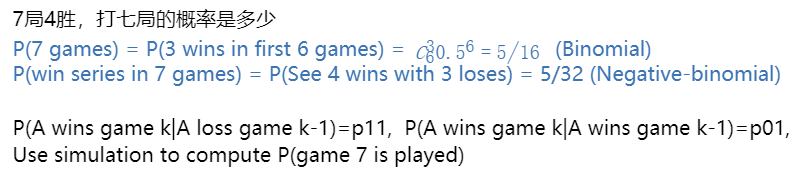

In [2]:
p=0.5
p_01=0.6
p_11=0.4

def who_wins(p):
    u=np.random.rand()
    return u>p
    

def game():
    n=0
    A_win=0
    B_win=0
    A_last_game=None
    
    while True:        
        if A_last_game is None:
            A_last_game = who_wins(p)
        elif A_last_game==1:
            A_last_game = who_wins(p_01)
        else:
            A_last_game = who_wins(p_11)
        
        n=n+1
        A_win+=A_last_game
        B_win+=1-A_last_game
        
        if A_win==4 or B_win==4:
            return n

In [3]:
sum([game()//7 for i in range(1000)])/1000

0.372

In [4]:
int(True)

1